# Project Title  
**Isaac Parreno & Rohan Kanumuri**, CPSC 222, Spring 2025  

---

## 1. Introduction

In this project we analyze two Netflix‐watch histories (CSV files) to…

1. Understand viewing patterns through EDA  
2. Statistically test whether one user watches proportionally more shows than the other  
3. Build features and use classifiers (Decision Tree, kNN) to predict which history belongs to which user  

## 2. Data Preparation

In [4]:
# 2.1 Load & clean both datasets
import utils
isaac_df = utils.load_and_clean("IsaacNetflixHistory.csv")
rohan_df = utils.load_and_clean("RohanNetflixHistory.csv")

> We load two CSVs and normalize columns: parse dates, fill missing series/episode, and keep only the needed fields.

In [5]:
# 2.2 Basic preview
isaac_df.head()

,Title,Date,Type,Series Name,Season and Episode,Watch Year
0,Breaking Bad: Season 1: Pilot,2025-04-18,Show,Breaking Bad,"Season 1, Episode: Pilot",2025
1,Meet the Parents,2025-04-17,Movie,N/A,N/A,2025
2,Meet the Fockers,2025-04-16,Movie,N/A,N/A,2025
3,Suits: Season 1: Play the Man,2025-04-09,Show,Suits,"Season 1, Episode: Play the Man",2025
4,Suits: Season 1: Tricks of the Trade,2025-04-09,Show,Suits,"Season 1, Episode: Tricks of the Trade",2025


In [6]:
rohan_df.head()

,Title,Date,Type,Series Name,Season and Episode,Watch Year
0,"High-Rise Invasion: I'm Sorry, Mayuko Nise",2025-02-11,Show,High-Rise Invasion,"I'm Sorry, Mayuko Nise",2025
1,High-Rise Invasion: I've Found a New Goal,2025-02-11,Show,High-Rise Invasion,I've Found a New Goal,2025
2,Suits: Season 1: Identity Crisis,2025-02-11,Show,Suits,Season 1: Identity Crisis,2025
3,Suits: Season 1: Play the Man,2025-02-11,Show,Suits,Season 1: Play the Man,2025
4,The Night Agent: Season 2: Disconnected,2025-02-11,Show,The Night Agent,Season 2: Disconnected,2025


> Above we see the schema: `Title`, `Date`, `Type`, `Series Name`, `Season and Episode`, `Watch Year`.  

## 3. Exploratory Data Analysis


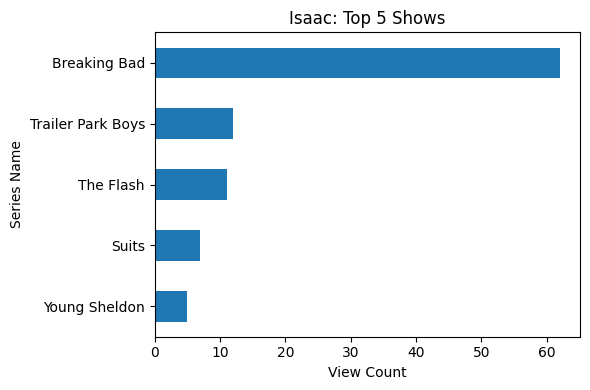

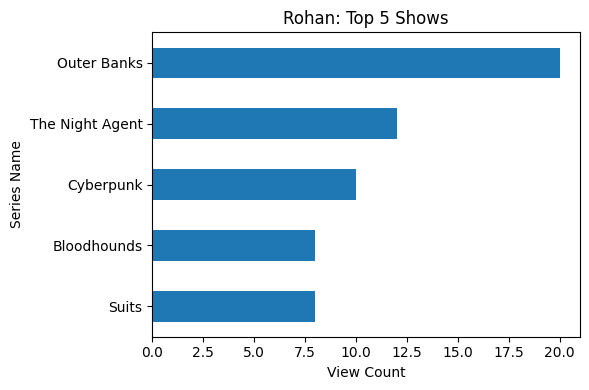

In [7]:
# Top 5 shows by episode count
import utils
utils.plot_top_shows(isaac_df, "Isaac", n=5)
utils.plot_top_shows(rohan_df, "Rohan", n=5)

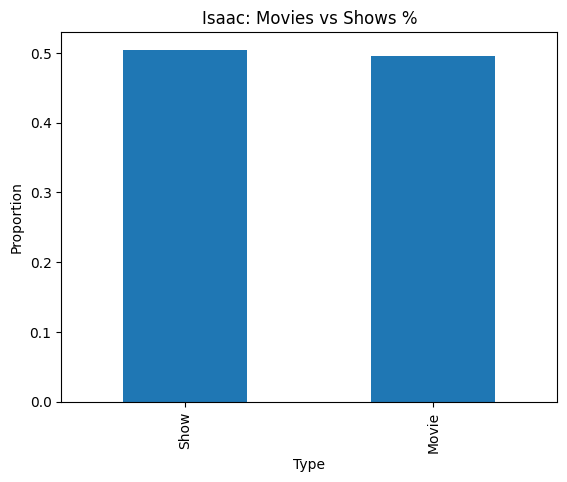

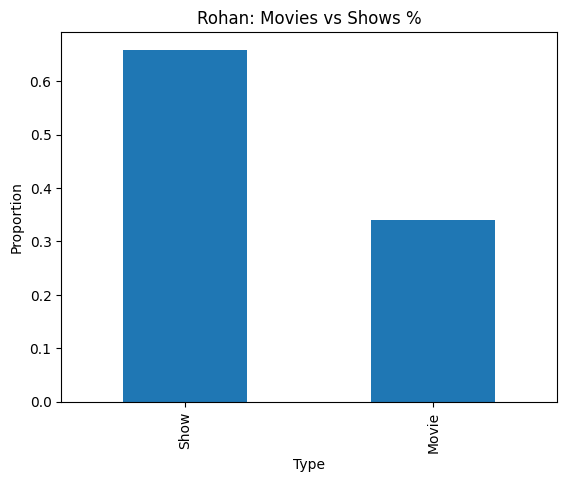

In [14]:
utils.plot_type_distribution(isaac_df, "Isaac")
utils.plot_type_distribution(rohan_df, "Rohan")

> Rohan watches a higher proportion of shows compared to Isaac (∼66% vs 50%).

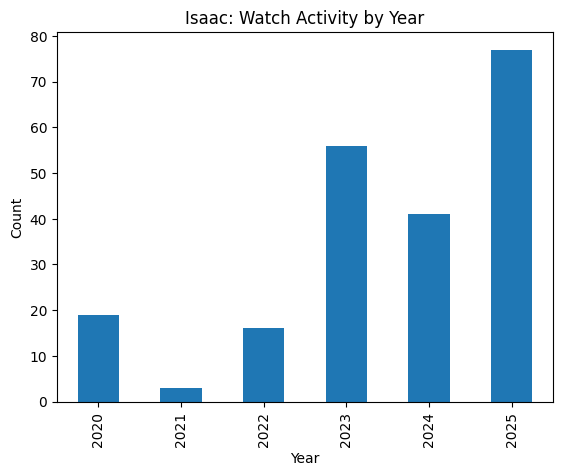

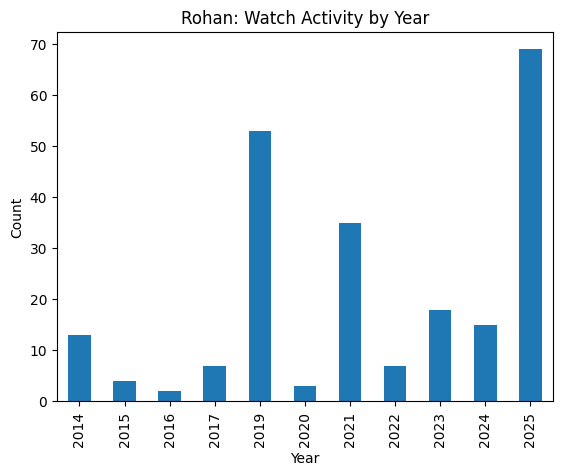

In [15]:
utils.plot_yearly_activity(isaac_df, "Isaac")
utils.plot_yearly_activity(rohan_df, "Rohan")

> Isaac’s data spans 2020–2025; Rohan’s spans 2014–2025 with peaks in 2019 and 2025.

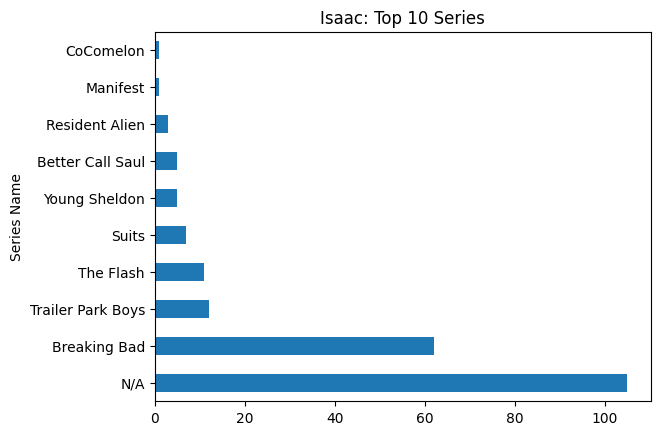

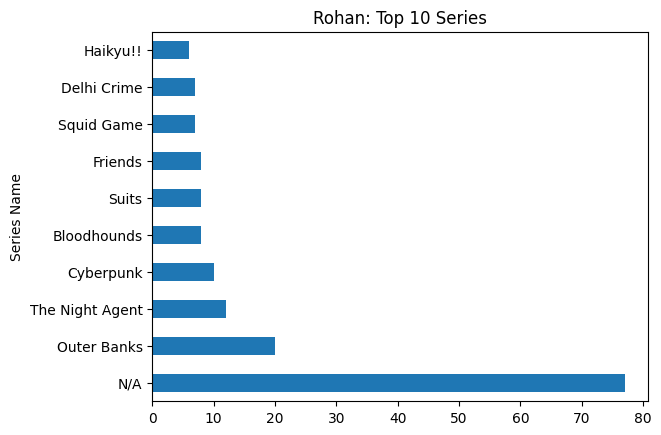

In [16]:
utils.plot_top_series(isaac_df, "Isaac")
utils.plot_top_series(rohan_df, "Rohan")

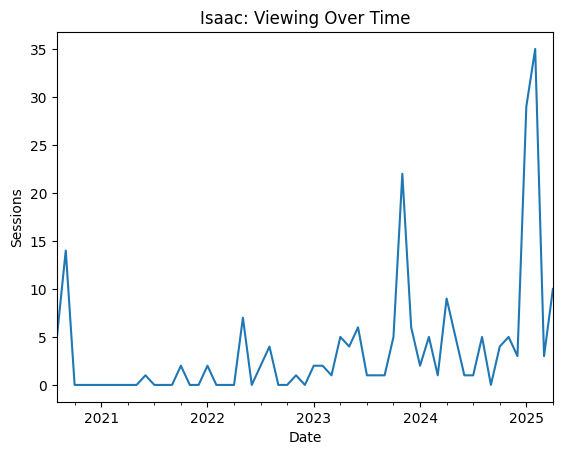

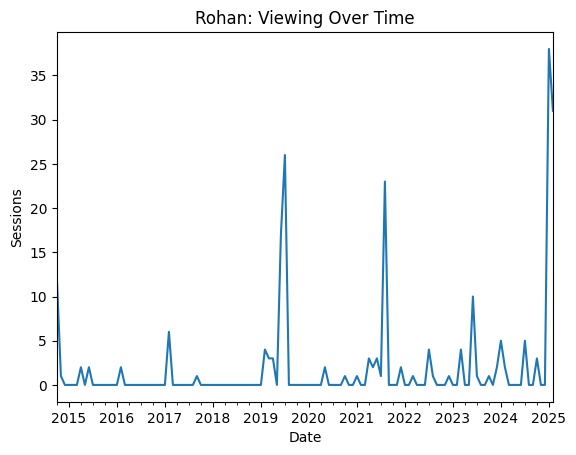

In [8]:
utils.plot_viewing_over_time(isaac_df, "Isaac")
utils.plot_viewing_over_time(rohan_df, "Rohan")

> Viewing‐over‐time shows Isaac’s monthly sessions avg ~2–4 since 2023, while Rohan has larger spikes in 2019, 2022, and 2025.

In [9]:
from utils import ttest_shows_2024
t_stat, p_value = ttest_shows_2024(isaac_df, rohan_df)
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if (t_stat > 0) and (p_value/2 < alpha):
    print("Reject H₀: Isaac watched a higher proportion of shows in 2024 than Rohan.")
else:
    print("Fail to reject H₀: Not enough evidence that Isaac watched more shows in 2024.")


T-statistic: 0.975
P-value: 0.3373
Fail to reject H₀: Not enough evidence that Isaac watched more shows in 2024.


## 4. Classification


In [ ]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix